#### 1. 测试分布效果
##### 1.1 测试0-1000 的分布效果

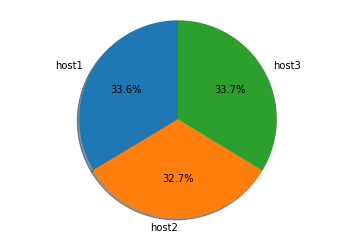

In [6]:
%run demo_jump.py

##### 1.2 测试0-1000 的分布效果

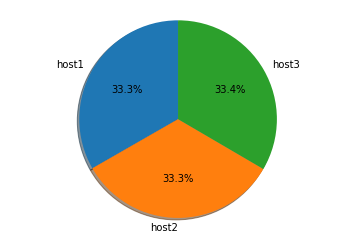

In [7]:
# 10000
%run demo_jump.py

#### 2.测试一致性

In [13]:
import jump
import binascii

In [10]:
hosts = [
    "host1",
    "host2",
    "host3",
]

In [20]:
key_host = []
for i in range(10):
    host = jump.hash(binascii.crc32(b'/b/apk/Y29tLm1vYmlsZS5sZWdlbmRzXzExNTIxMzMxX2U4ZGIzOTM1') & 0xffffffff, len(hosts))
    key_host.append(host)
key_host

[2, 2, 2, 2, 2, 2, 2, 2, 2, 2]